## Практическое задание

<ol>
    <li>Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?</li>
</ol>

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобятся для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


In [2]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


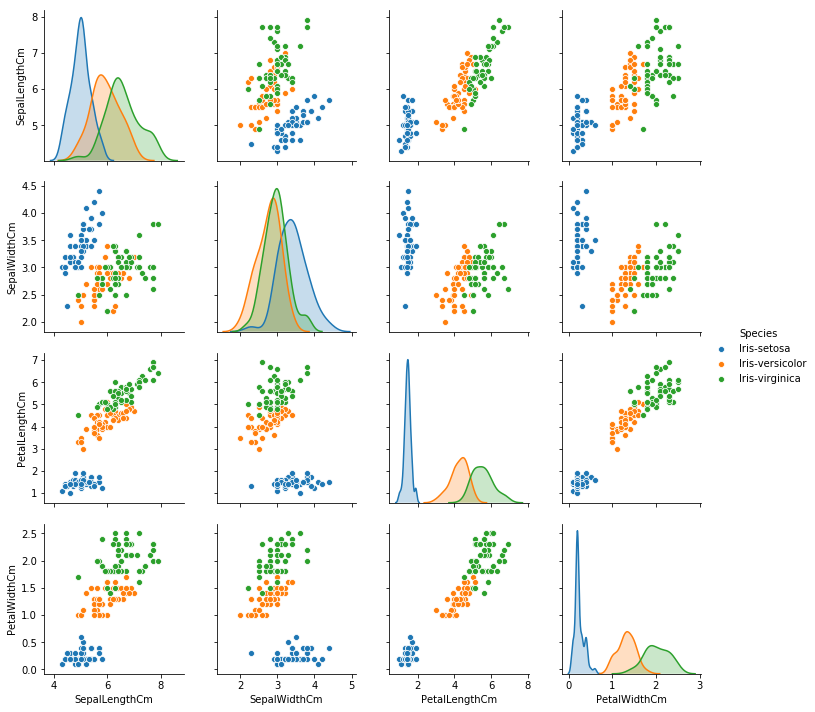

In [3]:

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть


In [4]:

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.as_matrix())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.as_matrix()
y = y.flatten()
y = to_one_hot(y)
y
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


In [32]:
   
### Шаг 3. Обученние нейронной сети

np.random.seed(1)

# присваивание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []



In [33]:
%%time
# процесс обучения

for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100



C:\Users\LMAXL\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp


Wall time: 15 s


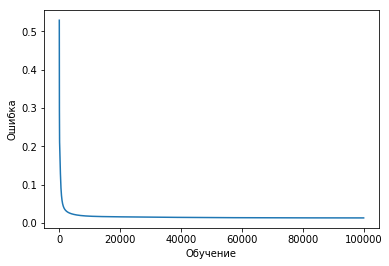

In [34]:

### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 


In [35]:
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 98.67%


In [36]:
errors[19999]

0.016070209768289184

In [37]:
errors[99999]

0.01325856541112854

Попробуем увеличить точность за счет увеличения скорости обучения:

In [90]:
   
### Повторный шаг 3. Обучение нейронной сети с большей скоростью обучения

np.random.seed(1)

# присваивание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.2 # увеличил в 2 раза

# массив для ошибок, чтобы потом построить график
errors = []



In [91]:
%%time
# процесс обучения

for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100



Wall time: 14.2 s


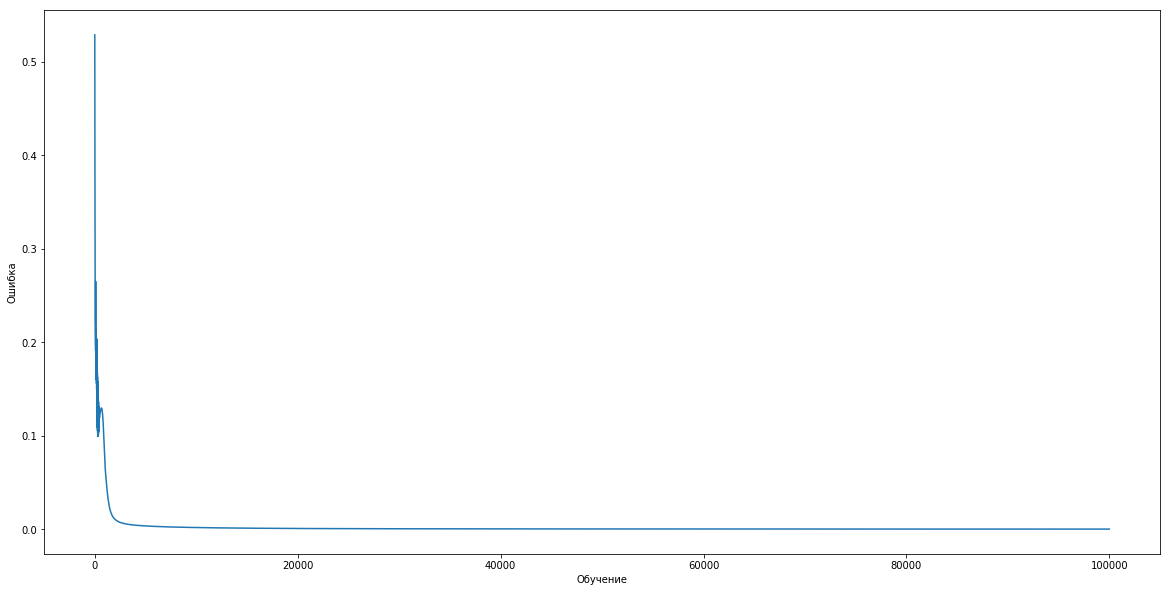

In [92]:
plt.figure(figsize=(20,10))
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 


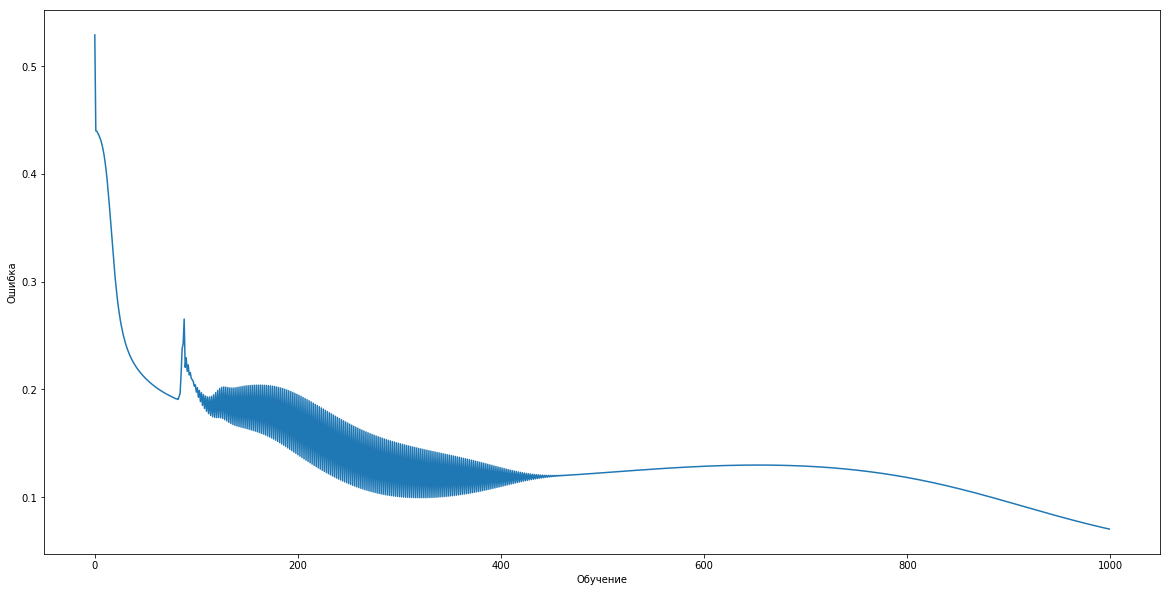

In [93]:
# детализация начальной диаграммы точности в зависимости от обучения
plt.figure(figsize=(20,10))

plt.plot(errors[:1000])
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 


In [94]:
errors[2049]

0.01001344631403964

In [95]:
round(100 - 100*errors[2049],4)

98.9987

In [96]:
errors[99999]

0.00012785472090039233

In [97]:
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 99.99%


Увеличение скорости обучения в данном случае повысило точность почти до 100%. Причем 99% точность была достигнута гораздо раньше. Поэтому можно задать минимальную точность (те же 0.99) и сократить количество эпох, остановив обучение при достижении нужного результата, и тем самым сократить время обучения.

Также интересный момент - из-за увеличения скорости обучения (шага) - в процессе обучения градиентный спуск "проскакивал" минимум и ошибка локально росла, а также был момент, когда шаг спуска "прыгал" то в сторону минимума, то обратно.

Пока попробуем еще увеличить скорость.

In [68]:
   
### Повторный шаг 3. Обучение нейронной сети с еще большей скоростью обучения

np.random.seed(1)

# присваивание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.5 # увеличил в 5 раз

# массив для ошибок, чтобы потом построить график
errors = []



In [69]:
%%time
# процесс обучения

for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100



Wall time: 14 s


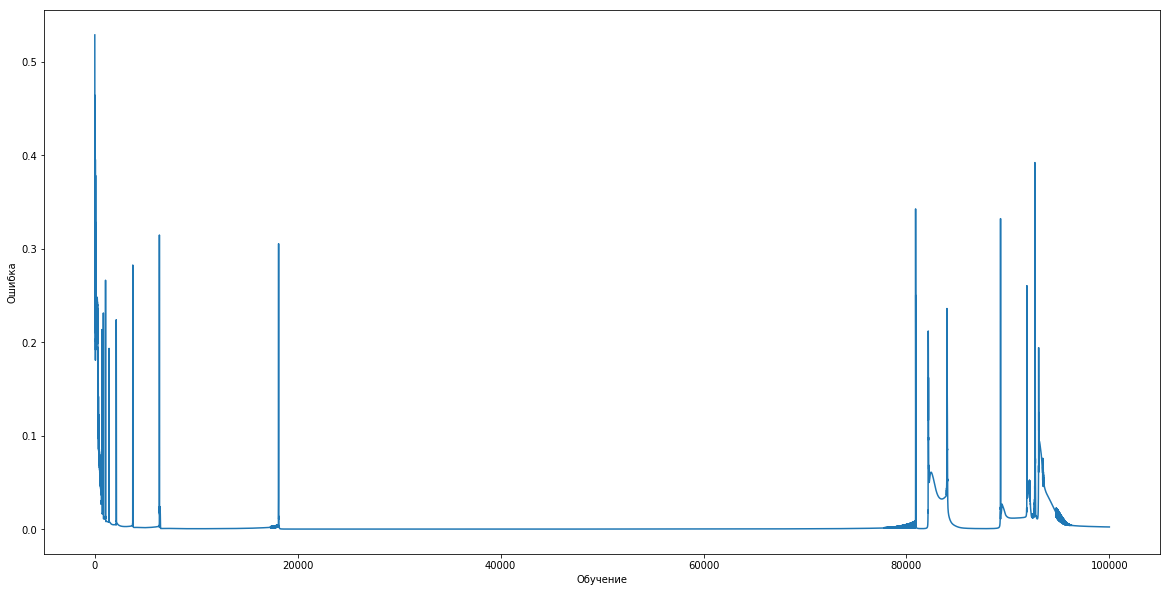

In [70]:
plt.figure(figsize=(20,10))
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 


In [71]:
errors[2049]

0.004952103843870163

In [72]:
round(100 - errors[2049],4)

99.995

In [73]:
errors[99999]

0.0023767477512142785

In [74]:
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 99.76%


Очевидно, что 0.5 - слишком большая скорость, из-за нее ошибка сильно "пляшет" и результат получается в итоге хуже, и, что самое плохое - он непредсказуем.

Пробуем уменьшить время обучения (колво эпох) при достижении ошибки уровня 0.0001 (точность 99.99%)

In [101]:
   
### Повторный шаг 3. Обучение нейронной сети с еще большей скоростью обучения

np.random.seed(1)

# присваивание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.2 # вернулся к "оптимальной" из 3х проверенных скоростей

# массив для ошибок, чтобы потом построить график
errors = []
error = np.inf


In [102]:
%%time
# процесс обучения

#for i in range(100000):
while error > 0.01:

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100



Wall time: 308 ms


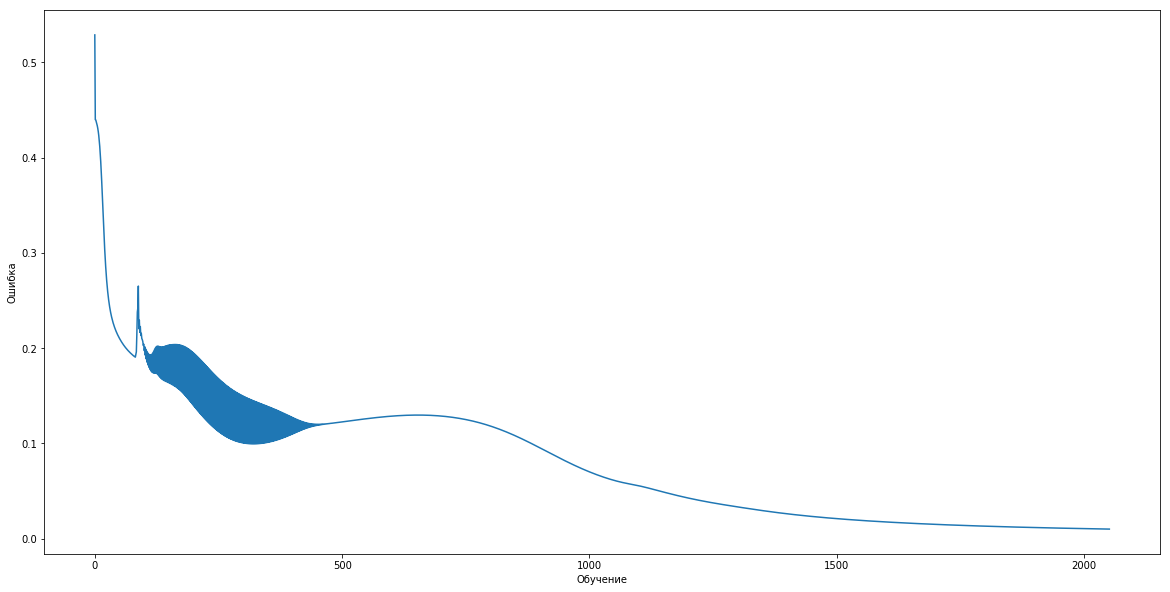

In [103]:
plt.figure(figsize=(20,10))
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 


In [104]:
len(errors)

2052

In [105]:
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 99.0%


Итак, с помощью подбора скорости обучения мы радикально ускорили обучение при достижении лучшего (чем изначально) и приемлемого результата.

Попробуем повторить обучение при других изначальных весах

In [106]:
   
### Повторный шаг 3. Обучение нейронной сети с еще большей скоростью обучения

np.random.seed(2)

# присваивание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 5 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.2 

# массив для ошибок, чтобы потом построить график
errors = []
error = np.inf


In [107]:
%%time
# процесс обучения

while error > 0.01 and len(errors)<100000:

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100



Wall time: 335 ms


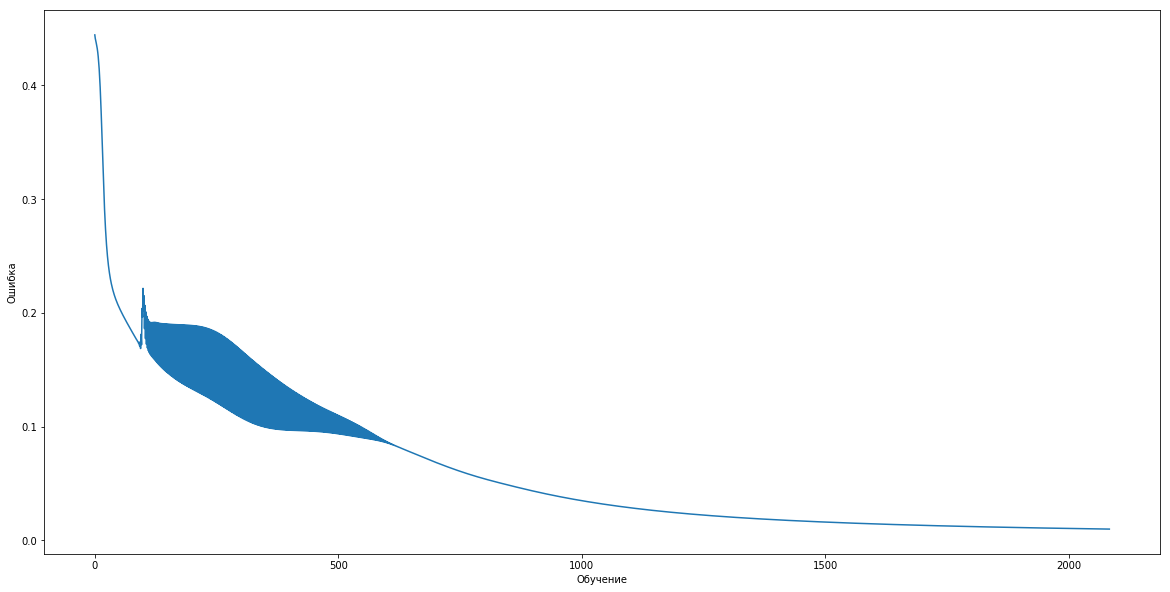

In [108]:
plt.figure(figsize=(20,10))
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 


In [109]:
len(errors)

2084

In [110]:
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 99.0%


В данном случае изменение начальных весов на результат почти не повлияло.

Изменим параметры нейронной сети:

In [111]:
   
### Повторный шаг 3. Обучение нейронной сети с другими параметрами

np.random.seed(1)

# присваивание случайных весов
w0 = 2*np.random.random((4, 7)) - 1 # для входного слоя   - 4 входа, 7 выходов
w1 = 2*np.random.random((7, 3)) - 1 # для внутреннего слоя - 7 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.2 # вернулся к "оптимальной" из 3х проверенных скоростей

# массив для ошибок, чтобы потом построить график
errors = []
error = np.inf


In [112]:
%%time
# процесс обучения

#for i in range(100000):
while error > 0.01 and len(errors)<100000:

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100



Wall time: 508 ms


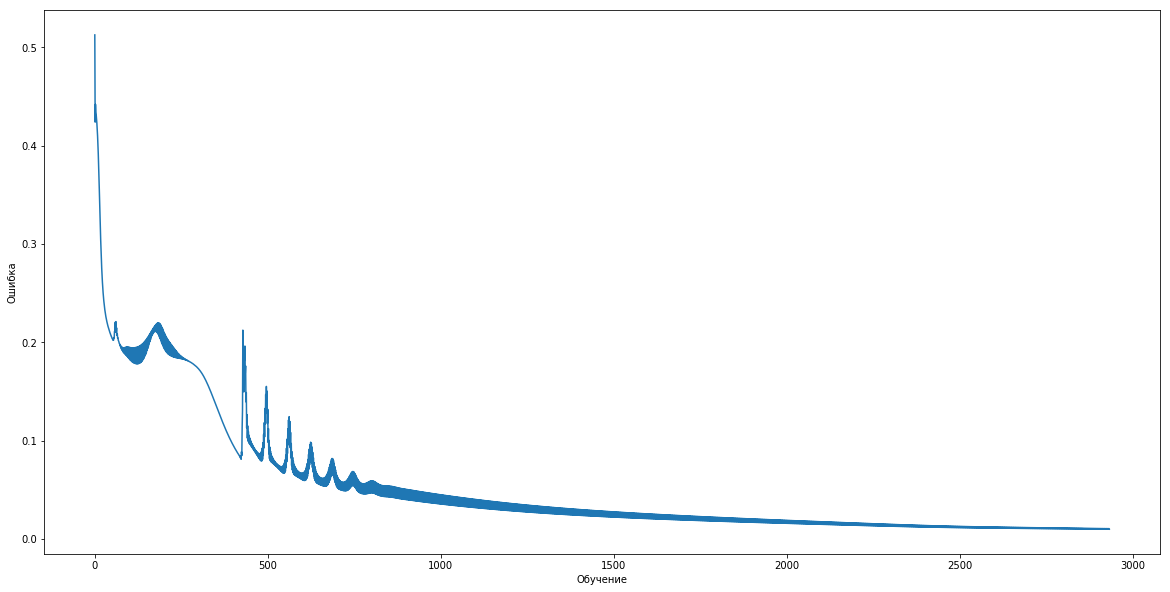

In [113]:
plt.figure(figsize=(20,10))
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 


In [114]:
len(errors)

2934

In [115]:
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 99.0%


Более сложная сеть обучается дольше. Попробуем уменьшить колво нейронов

In [117]:
   
### Повторный шаг 3. Обучение нейронной сети с меньшим колвом нод

np.random.seed(1)

# присваивание случайных весов
w0 = 2*np.random.random((4, 3)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((3, 3)) - 1 # для внутреннего слоя - 3 входа, 3 выхода

# скорость обучения (learning rate)
n = 0.2 

# массив для ошибок, чтобы потом построить график
errors = []
error = np.inf


In [118]:
%%time
# процесс обучения

while error > 0.01 and len(errors) < 100000:

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100



C:\Users\LMAXL\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp


Wall time: 14.6 s


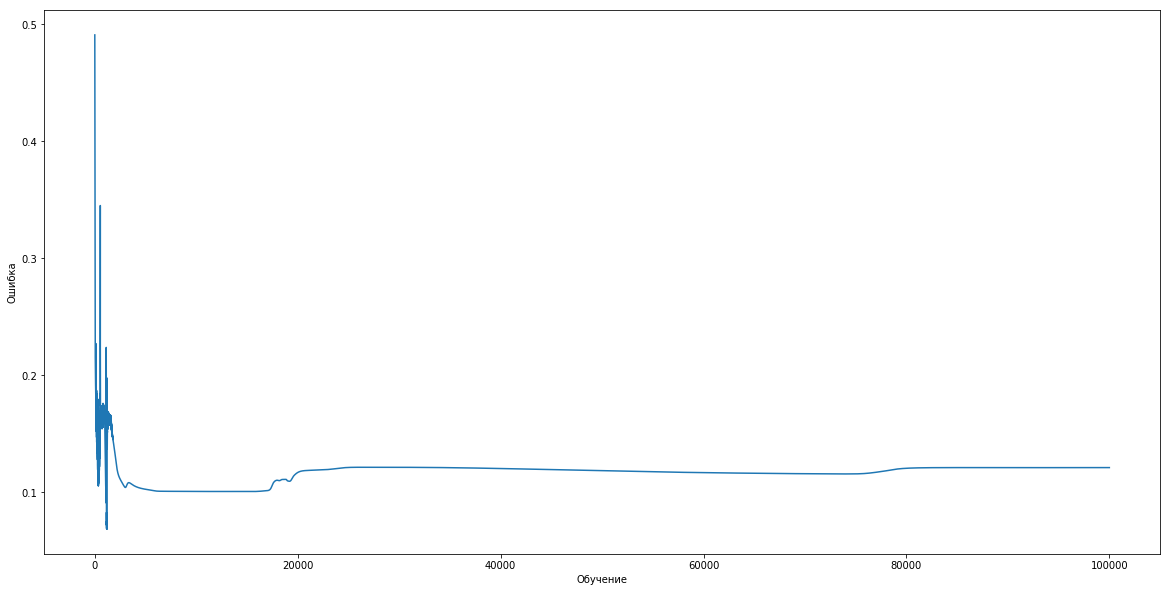

In [119]:
plt.figure(figsize=(20,10))
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 


In [120]:
len(errors)

100000

In [121]:
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 87.89%


Здесь либо неудачная конфигурация нейросети, либо слишком большая скорость обучения. Проверим гипотезу, уменьшив скорость обучения:

In [122]:
   
### Повторный шаг 3. Обучение нейронной сети с меньшим колвом нод, с меньшей скоростью

np.random.seed(1)

# присваивание случайных весов
w0 = 2*np.random.random((4, 3)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((3, 3)) - 1 # для внутреннего слоя - 3 входа, 3 выхода

# скорость обучения (learning rate)
n = 0.1 

# массив для ошибок, чтобы потом построить график
errors = []
error = np.inf


In [123]:
%%time
# процесс обучения

while error > 0.01 and len(errors) < 100000:

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100



C:\Users\LMAXL\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp


Wall time: 14.3 s


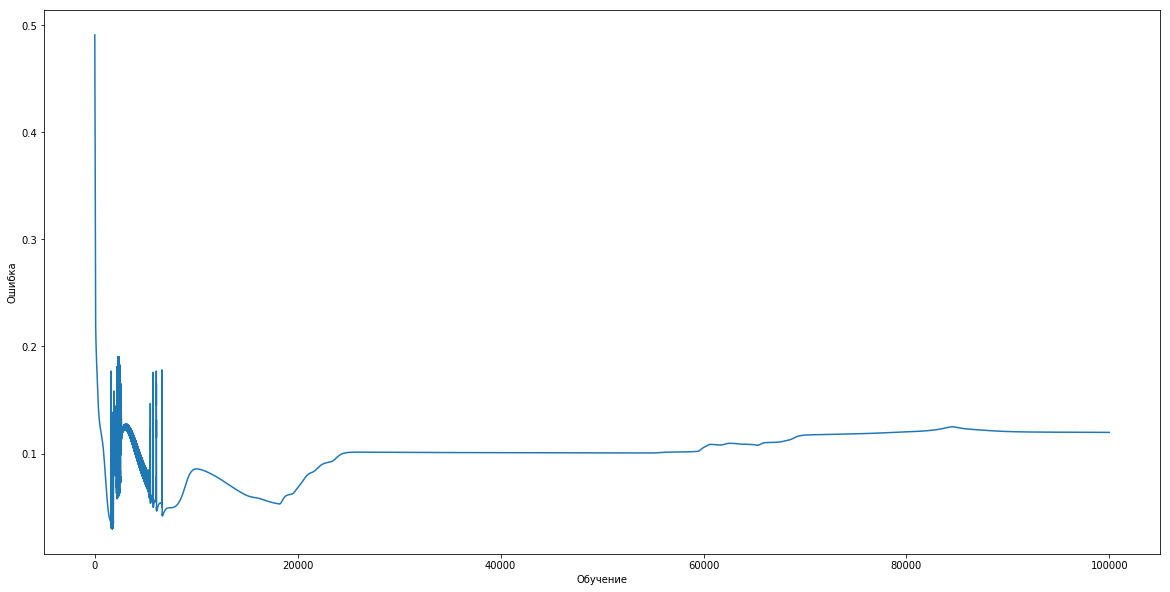

In [124]:
plt.figure(figsize=(20,10))
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 


In [125]:
len(errors)

100000

In [126]:
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 88.02%


Видимо, дело в конфигурации сети (мало нод во внутреннем слое)

Выводы:
1. Увеличение скорости обучения до определенного предела приводит к увеличению скорости обучения и к более быстрому достижению нужного результата. При этом, если скорость обучения переходит зп некий предел - качество обучения ухудшается и даже становится неприемлемым (не "сходится"). 

Изначальные веса влияют на скорость и качество обучения, но не очень значительно.

Увеличение нод во внутреннем слое усложняет и замедляет обучение.
Уменьшение нод во внутреннем слое в данном случае не дало нужного результата (нейросеть дала худший результат, ниже требуемого).